In [1]:
#@title
# Import tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Conv2D, MaxPooling2D,Flatten,Dropout,BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
import requests
import tarfile

# CIFAR-10 dataset URL
cifar_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

# Download and extract the dataset
response = requests.get(cifar_url, stream=True)
with tarfile.open(fileobj=response.raw, mode="r:gz") as tar:
    tar.extractall()

# Optionally, move the extracted files to a specific folder
# For example, moving to the "/content/cifar-10" folder
!mv cifar-10-batches-py /content/cifar-10

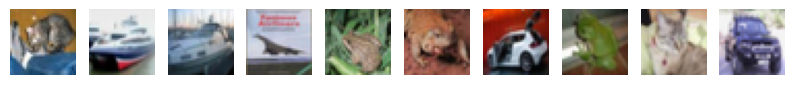

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

# Function to load CIFAR-10 batch file
def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        datadict = cPickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
        Y = np.array(Y)
    return X, Y

# Path to the CIFAR-10 dataset folder
dataset_path = "/content/cifar-10"

# Load the training batch
Imdata, train_labels = load_cifar_batch(f"{dataset_path}/test_batch")

# Display the first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(Imdata[i])
    plt.axis('off')
plt.show()


In [93]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the learning rate
learning_rate = 0.0001

# Define whether to use L2 regularization and the lambda value
use_l2_reg = False
l2_loss_lambda = 0.0002

# Define l2 variable for regularization
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

# Build the model
model = models.Sequential()

# Convolutional and pooling layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                        kernel_regularizer=l2, input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Additional Conv => RELU => POOL layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                        kernel_regularizer=l2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [96]:

# Train the model
history = model.fit(train_images, train_labels, epochs=200, validation_data=(test_images, test_labels))



Epoch 1/200
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6109 - accuracy: 0.4370 - val_loss: 1.2740 - val_accuracy: 0.5509
Epoch 2/200
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2675 - accuracy: 0.5482 - val_loss: 1.0676 - val_accuracy: 0.6200
Epoch 3/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1401 - accuracy: 0.5997 - val_loss: 1.0402 - val_accuracy: 0.6449
Epoch 4/200
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0531 - accuracy: 0.6313 - val_loss: 0.9060 - val_accuracy: 0.6806
Epoch 5/200
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9775 - accuracy: 0.6567 - val_loss: 0.9000 - val_accuracy: 0.6865
Epoch 6/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9176 - accuracy: 0.6818 - val_loss: 0.9283 - val_accuracy: 0.6850
Epoch 7/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8637 - accuracy: 0.6972 - val_loss: 1.0488 -

In [2]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


NameError: name 'model' is not defined

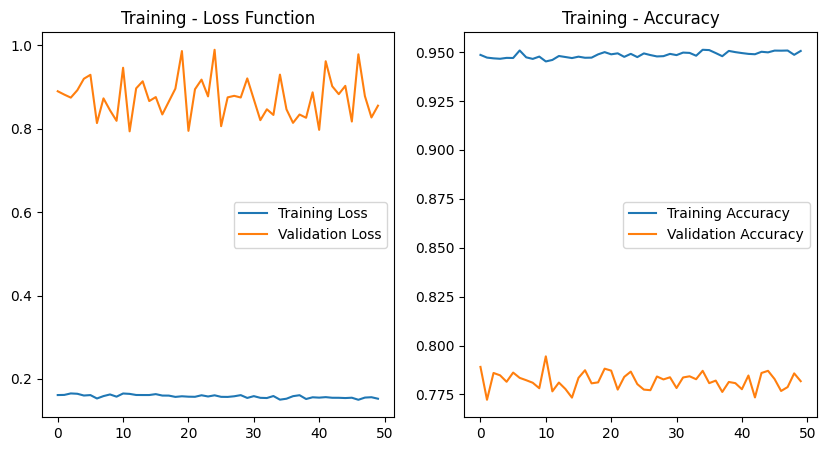

In [95]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training - Accuracy')

plt.show()

In [75]:
model.save("model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:

from keras.models import load_model

loaded_model = load_model("model.h5")


In [77]:

from keras.preprocessing import image
import numpy as np

# Replace "path_to_your_image.jpg" with the actual path to your image file
img_path = "/content/download (1).jfif"

# Load the image with target size matching the input shape of your model
img = image.load_img('/content/download (1).jfif', target_size=(28,28))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's expected input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image data
img_array /= 255.0



In [78]:

from PIL import Image

# Load the image and convert it to grayscale
img = Image.open("/content/download (1).jfif").convert("L")

# Resize the image to match the input size of your model
img = img.resize((10, 10))

# Convert the image to a numpy array and explicitly set dtype to float
img_array = np.expand_dims(np.array(img, dtype=float), axis=0)

# Normalize the image data
img_array /= 255.0



In [82]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/model.h5')

# Load and preprocess the image
img_path = '/content/download (1).jfif'
img = image.load_img(img_path, target_size=(299, 299))  # Adjust target_size based on your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Ensure the input shape matches the model's input shape
expected_shape = loaded_model.input_shape[1:3]  # Assuming channel-last format (height, width, channels)
if img_array.shape[1:3] != expected_shape:
    img_array = image.load_img(img_path, target_size=expected_shape)
    img_array = image.img_to_array(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

# Get model predictions for the image
predictions = loaded_model.predict(img_array)

# Replace this with your actual class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get the index of the predicted class with the highest probability
predicted_class_index = np.argmax(predictions[0])

# Get the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print(f"The predicted class is: {predicted_class_label}")


1/1 [==============================] - 0s 91ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 10)